In [0]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files

In [64]:
files.upload()

{}

In [0]:
data = pd.read_csv("train_NIR5Yl1.csv")

In [66]:
data.head(5)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [67]:
data.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [68]:
data.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [69]:
data.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


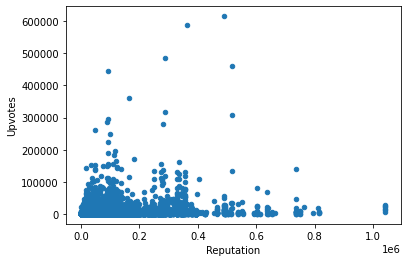

In [70]:
data.plot(kind="scatter",x='Reputation',y='Upvotes')

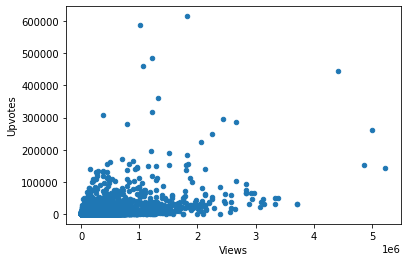

In [71]:
data.plot(kind='scatter',x="Views",y="Upvotes")

In [72]:
data.corr()

,ID,Reputation,Answers,Username,Views,Upvotes
ID,1.000000,0.008546,0.017448,0.000628,0.017400,0.006328
Reputation,0.008546,1.000000,0.066504,-0.041019,0.036455,0.266710
Answers,0.017448,0.066504,1.000000,-0.012197,0.498642,0.202033
Username,0.000628,-0.041019,-0.012197,1.000000,0.002306,-0.011970
Views,0.017400,0.036455,0.498642,0.002306,1.000000,0.437336
Upvotes,0.006328,0.266710,0.202033,-0.011970,0.437336,1.000000


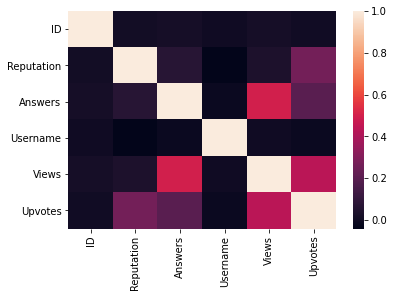

In [73]:
sns.heatmap(data.corr())

In [74]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [0]:
x = data.iloc[:,[2,5]]
y = data.iloc[:,6].values

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
y = y.reshape(-1,1)
y = sc.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
def model():
  regressor = Sequential()

  regressor.add(Dense(20,kernel_initializer="uniform",activation='relu',input_dim=2))
  regressor.add(Dense(15,kernel_initializer='uniform',activation="relu"))
  regressor.add(Dense(1,kernel_initializer='uniform',activation="linear"))

  regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy','mse'])

  return regressor

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor

In [0]:
regressor = KerasRegressor(build_fn=model,batch_size=500,epochs=90)

In [97]:
regressor.fit(x_train,y_train)

Epoch 1/90
264036/264036 [==============================] - 1s 3us/step - loss: 0.6037 - accuracy: 0.0000e+00 - mse: 0.6037
Epoch 2/90
264036/264036 [==============================] - 1s 3us/step - loss: 0.3681 - accuracy: 0.0000e+00 - mse: 0.3681
Epoch 3/90
264036/264036 [==============================] - 1s 3us/step - loss: 0.2943 - accuracy: 0.0000e+00 - mse: 0.2943
Epoch 4/90
264036/264036 [==============================] - 1s 3us/step - loss: 0.2503 - accuracy: 0.0000e+00 - mse: 0.2503
Epoch 5/90
264036/264036 [==============================] - 1s 3us/step - loss: 0.2276 - accuracy: 0.0000e+00 - mse: 0.2276
Epoch 6/90
264036/264036 [==============================] - 1s 3us/step - loss: 0.1995 - accuracy: 0.0000e+00 - mse: 0.1995
Epoch 7/90
264036/264036 [==============================] - 1s 3us/step - loss: 0.1760 - accuracy: 0.0000e+00 - mse: 0.1760
Epoch 8/90
264036/264036 [==============================] - 1s 3us/step - loss: 0.1658 - accuracy: 0.0000e+00 - mse: 0.1658
Epoch 9/

In [0]:
y_pred = regressor.predict(x_test)

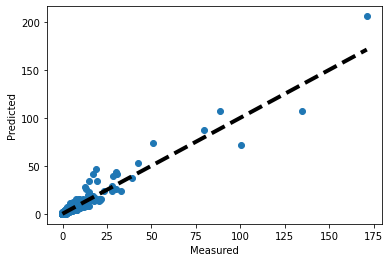

In [100]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [0]:
x_new = np.array([[4545,646]])
x_new = sc.transform(x)
y_new = regressor.predict(x_new)
x_new = sc.inverse_transform(x_new)
y_new = sc.inverse_transform(y_new)
print(y_new,x_new)